### 1.Data cleaning (10 marks):
The tweets, as given, are not in a form amenable to analysis – there is too much ‘noise’. Therefore, the first step is to “clean” the data. Design a procedure that prepares the Twitter data for analysis by satisfying the requirements below. Remember to use the same pipeline for both datasets.

• All html tags and attributes (i.e., /<[^>]+>/) are removed.

• Html character codes (i.e., &...;) are replaced with an ASCII equivalent.

• All URLs are removed.

• All characters in the text are in lowercase.

• All stop words are removed. Be clear in what you consider as a stop word.

• If a tweet is empty after pre-processing, it should be preserved as such.

In [1]:
#!pip install xgboost

In [2]:
#conda install py-xgboost

In [3]:
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import html
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import nltk
from pylab import rcParams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn import preprocessing as prep
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold

/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_43198/3545649700.py:3: UserWarning: DelftStack
  warnings.warn('DelftStack')


In [4]:
# import data
sentiment = pd.read_csv('sentiment_analysis.csv')
election=  pd.read_csv('Canadian_elections_2021.csv')

#### 1.1 All html tags and attributes (i.e., /<[^>]+>/) are removed.

In [5]:
# Remove all html tags and attributes, use the beautiful soup
def html_tags_attributes(df):
    text=BeautifulSoup(df,'html.parser')
    return text.get_text()

In [6]:
# Apply in the def function that I create html_tags_attributes for both dataframe
sentiment['text'] = sentiment["text"].apply(html_tags_attributes)
election['text'] = election["text"].apply(html_tags_attributes)

In [7]:
election.head()

,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN


In [8]:
sentiment.head()

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1


#### 1.2 Html character codes (i.e., &...;) are replaced with an ASCII equivalent.

In [9]:
# Html character codes (i.e., &...;) are replaced with an ASCII equivalent, the def function is html_ASCII
def html_ASCII(df):
    text_remove = html.unescape(df)
    return text_remove

In [10]:
# Apply in the def function that I create html_ASCII for both dataframe
sentiment['text'] = sentiment["text"].apply(html_ASCII)
election['text'] = election["text"].apply(html_ASCII)

In [11]:
election.head()

,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN


In [12]:
sentiment.head()

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1


#### 1.3 All URLs are removed.


In [13]:
# All URLs are removed, the define function is urls. Use the 're.sub' to replace the urls to blank (remove them).
# First search the 'http', then replace them into ''.
def urls(df):
    df=re.sub(r"http\S+",'', df)
    return df

In [14]:
# Apply in the def function that I create urls for both dataframe
sentiment['text'] = sentiment["text"].apply(urls)
election['text'] = election["text"].apply(urls)

In [15]:
# In order to see the whole row, so I use the 'pd.set_option'
pd.set_option('display.max_colwidth', -1)
election.head()

/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_43198/2619124504.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,text,sentiment,negative_reason
0,"The Canadian election is a power grab by PM Trudeau, yes -- to take it away from the opposition leaders who have chosen obstruction (20 non-confidence motions) and disinformation in the middle of a worldwide pandemic. Yes, no one wanted a vote; the opposition antics forced it.",negative,calling election early
1,"I do hope Trudeau loses the Canadian election tomorrow , called a snap one thinking he’d romp it.. Seems the people there don’t like a Black face hypocrite, super wokist & COVID restriction groupie.. Let’s hope the polls are right, might make our Government think again.",negative,covid
2,"Dear Canadians, This election is a test of how progressive we are. Whether we stand by science, women’s and BIPOC rights, equality, public healthcare & education, the environment. Whether we stand up against hate. We have so much to lose. Don’t let us fall back. #cdnpoli #elxn44",positive,NaN
3,Canadian friends: Never forget that Trudeau had 2 more years on his mandate + called a completely unnecessary election right when vaccine mandates were being rolled out - a moment of extreme political volatility. He gambled the country all so he could be less accountable. #Elxn44,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all my life but in this election I am fighting for my freedoms as a Canadian. I voted last Saturday for @MaxineBernier of the @peoplespca #ppc #VotePPC2021 #VoteForHumanRights #voteforfreedom #maximebernier #PurpleReign #freedom 🇨🇦💜🇨🇦💜🇨🇦,positive,NaN


In [16]:
pd.set_option('display.max_colwidth', -1)

sentiment['text'].head()

/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_43198/4267008308.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


0    Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday                                                           
1    RT @MianUsmanJaved: Congratulations Pakistan on becoming #No1TestTeam in the world against all odds! #JI_PakZindabadRallies  
2    RT @PEPalerts: This September, @YESmag is taking you to Maine Mendoza’s surprise thanksgiving party she threw for her fans!  
3    RT @david_gaibis: Newly painted walls, thanks a million to our custodial painters this summer.  Great job ladies!!!#EC_proud 
4    RT @CedricFeschotte: Excited to announce: as of July 2017 Feschotte lab will be relocating to @Cornell MBG                   
Name: text, dtype: object

In [17]:
sentiment.head()

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeders Crown Super Sunday,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan on becoming #No1TestTeam in the world against all odds! #JI_PakZindabadRallies,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taking you to Maine Mendoza’s surprise thanksgiving party she threw for her fans!",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks a million to our custodial painters this summer. Great job ladies!!!#EC_proud",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as of July 2017 Feschotte lab will be relocating to @Cornell MBG,1


#### 1.4 All characters in the text are in lowercase.

In [18]:
# Make the text become in lowercase
def lower_case(df):
    df = df.lower()
    return df

In [19]:
# Apply in the def function that I create lower_case for both dataframe
election['text'] = election['text'].apply(lower_case)
sentiment['text'] = sentiment["text"].apply(lower_case)

In [20]:
election.head()
sentiment.head()

,ID,text,label
0,7.680980e+17,josh jenkins is looking forward to tab breeders crown super sunday,1
1,7.680980e+17,rt @mianusmanjaved: congratulations pakistan on becoming #no1testteam in the world against all odds! #ji_pakzindabadrallies,1
2,7.680980e+17,"rt @pepalerts: this september, @yesmag is taking you to maine mendoza’s surprise thanksgiving party she threw for her fans!",1
3,7.680980e+17,"rt @david_gaibis: newly painted walls, thanks a million to our custodial painters this summer. great job ladies!!!#ec_proud",1
4,7.680980e+17,rt @cedricfeschotte: excited to announce: as of july 2017 feschotte lab will be relocating to @cornell mbg,1


#### 1.5 All stop words are removed. Be clear in what you consider as a stop word.

In [21]:
# A stop word is a commonly word, such that 'the, an, a', which is useless information
# First we download the English stop words
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words=stopwords.words('english')
#stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ningcansun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Use lambda funtion to remove the stop words
election['text']= election['text'].apply(lambda x: ' '.join([i for i in x.split() if i not in (stop_words)]))
sentiment['text']= sentiment['text'].apply(lambda x: ' '.join([i for i in x.split() if i not in (stop_words)]))

In [23]:
election['text'].head()

0    canadian election power grab pm trudeau, yes -- take away opposition leaders chosen obstruction (20 non-confidence motions) disinformation middle worldwide pandemic. yes, one wanted vote; opposition antics forced it.                   
1    hope trudeau loses canadian election tomorrow , called snap one thinking he’d romp it.. seems people don’t like black face hypocrite, super wokist & covid restriction groupie.. let’s hope polls right, might make government think again.
2    dear canadians, election test progressive are. whether stand science, women’s bipoc rights, equality, public healthcare & education, environment. whether stand hate. much lose. don’t let us fall back. #cdnpoli #elxn44                  
3    canadian friends: never forget trudeau 2 years mandate + called completely unnecessary election right vaccine mandates rolled - moment extreme political volatility. gambled country could less accountable. #elxn44                       
4    sorry @thejagmeetsingh voted #n

In [24]:
sentiment['text'].head()

0    josh jenkins looking forward tab breeders crown super sunday                                                 
1    rt @mianusmanjaved: congratulations pakistan becoming #no1testteam world odds! #ji_pakzindabadrallies        
2    rt @pepalerts: september, @yesmag taking maine mendoza’s surprise thanksgiving party threw fans!             
3    rt @david_gaibis: newly painted walls, thanks million custodial painters summer. great job ladies!!!#ec_proud
4    rt @cedricfeschotte: excited announce: july 2017 feschotte lab relocating @cornell mbg                       
Name: text, dtype: object

#### 1.6 Other data clean step

In [25]:
# I noticed there are lots of emojis, it will influence the text.
# Remove emoji
def emoji(df):
    moji=re.compile( "["
        u"\U0001F300-\U0001F5FF"  # symbols
        u"\U0001F600-\U0001F64F"  # face emotion
        u"\U0001F1E0-\U0001F1FF"  # flags (because it is elections, so there must lots of people use canada's flag)
        u"\U0001F680-\U0001F6FF"  # map
         "]+",re.UNICODE)
    return re.sub(moji,'',df)

In [26]:
# Apply in the def function that I create ‘emoji’ for both dataframe
election['text'] = election['text'].apply(emoji)
sentiment['text'] = sentiment["text"].apply(emoji)

In [27]:
election['text'].head()

0    canadian election power grab pm trudeau, yes -- take away opposition leaders chosen obstruction (20 non-confidence motions) disinformation middle worldwide pandemic. yes, one wanted vote; opposition antics forced it.                   
1    hope trudeau loses canadian election tomorrow , called snap one thinking he’d romp it.. seems people don’t like black face hypocrite, super wokist & covid restriction groupie.. let’s hope polls right, might make government think again.
2    dear canadians, election test progressive are. whether stand science, women’s bipoc rights, equality, public healthcare & education, environment. whether stand hate. much lose. don’t let us fall back. #cdnpoli #elxn44                  
3    canadian friends: never forget trudeau 2 years mandate + called completely unnecessary election right vaccine mandates rolled - moment extreme political volatility. gambled country could less accountable. #elxn44                       
4    sorry @thejagmeetsingh voted #n

In [28]:
sentiment['text'].head()

0    josh jenkins looking forward tab breeders crown super sunday                                                 
1    rt @mianusmanjaved: congratulations pakistan becoming #no1testteam world odds! #ji_pakzindabadrallies        
2    rt @pepalerts: september, @yesmag taking maine mendoza’s surprise thanksgiving party threw fans!             
3    rt @david_gaibis: newly painted walls, thanks million custodial painters summer. great job ladies!!!#ec_proud
4    rt @cedricfeschotte: excited announce: july 2017 feschotte lab relocating @cornell mbg                       
Name: text, dtype: object

In [29]:
election.isna().sum()

text               0  
sentiment          0  
negative_reason    615
dtype: int64

In [30]:
election.head()

,text,sentiment,negative_reason
0,"canadian election power grab pm trudeau, yes -- take away opposition leaders chosen obstruction (20 non-confidence motions) disinformation middle worldwide pandemic. yes, one wanted vote; opposition antics forced it.",negative,calling election early
1,"hope trudeau loses canadian election tomorrow , called snap one thinking he’d romp it.. seems people don’t like black face hypocrite, super wokist & covid restriction groupie.. let’s hope polls right, might make government think again.",negative,covid
2,"dear canadians, election test progressive are. whether stand science, women’s bipoc rights, equality, public healthcare & education, environment. whether stand hate. much lose. don’t let us fall back. #cdnpoli #elxn44",positive,NaN
3,canadian friends: never forget trudeau 2 years mandate + called completely unnecessary election right vaccine mandates rolled - moment extreme political volatility. gambled country could less accountable. #elxn44,negative,calling election early
4,sorry @thejagmeetsingh voted #ndp life election fighting freedoms canadian. voted last saturday @maxinebernier @peoplespca #ppc #voteppc2021 #voteforhumanrights #voteforfreedom #maximebernier #purplereign #freedom,positive,NaN


#### <div style='color:Blue'> For each step what they are doing, I already put in the cells commment. I will also mention in the report.

#### <div style='color:blue'> - Data Cleaning: What it is doing?
    
<div style='color: Tomato'> The Data cleaning step is remove urls, emojis, keep data standard.

#### <div style='color:blue'> - Data Cleaning : In over all data clean it is important? 
    
<div style='color: Tomato'> The Data cleaning step is really important, because this data include lots of text, when I see the raw data, I found there are lots of urls, emojis, some words are lower case some words have capital letter, which is really difficult for me to explortory the data and model the data, there are too many noises, it will influence the analysis answer.

### 2. Exploratory analysis (15 marks):

1. Design a simple procedure that determines the political party (Liberal, Conservative, New Democratic Party (NDP), The People's Party of Canada (PPC)) of a given tweet and apply this procedure to all the tweets in the Canadian Elections dataset. A suggestion would be to look at relevant words and hashtags in the tweets that identify to certain political parties or candidates. What can you say about the distribution of the political affiliations of the tweets?


2. Present a graphical figure (e.g. chart, graph, histogram, boxplot, word cloud, etc.) that visualizes some aspect of the generic tweets in sentiment_analysis.csv and another figure for the 2021 Canadian Elections tweets. All graphs and plots should be readable and have all axes that are appropriately labelled. Discuss your findings.


###  2.1 Determines the political party

In [31]:
# I want to set some key words to represent the political parties
# Use the for loop to find the whether each tweet text include the following keywords.
# If it include in the keywords, then, append them in that party.
def political_party(tweet_text):
    final_party=[]
    liberal_party=['justin','trudeau','liberal','liberalism','istandwithtrudeau','voteliberal']
    conservative_party=['erin','toole','voteconservative','blue','cpc','conservative']
    new_democratic_party=['ndp','ndp2021','ndpoverhaul','jagmeet','singh','jagmeetsingh','newdemocratic']
    people_party=['ppc','voteppc','voteppc2021','maxime','bernier','maximebernier','people']
    
    # I have already set the blank list, which is'final_party', next to add in the blank list
    for i in tweet_text:
        if i in liberal_party:
            final_party.append('liberal party')
            ### print("detected")
        if i in conservative_party:
            final_party.append('conservative party')
        if i in new_democratic_party:
            final_party.append('new democratic party')
        if i in people_party:
            final_party.append('ppc party')
    # However, it may have one tweet mention more than one party groups. Then I need to select the first party
    # The reason I choose the first mention party because the political that people more care about, the people will mention first
    if len(final_party)>=1:
        final_result=final_party[0]
    # if there is no key word match to parties, then, return the 'not sure'  
    if len(final_party)==0:
        final_result = 'not sure'
    
    return final_result


In [32]:
# Seperate the text, use the split function
election_temp=election.copy()
election_temp['text'] = election_temp['text'].str.split(' ') 

In [33]:
# test the first row's political party
political_party(election_temp['text'][0])

'not sure'

In [34]:
# Creat a new column, called political party
election_temp['political_party'] = ''
for i in range(election_temp['text'].shape[0]):
    election_temp['political_party'][i] = political_party(election_temp['text'][i])

In [35]:
election_temp.head()

,text,sentiment,negative_reason,political_party
0,"[canadian, election, power, grab, pm, trudeau,, yes, --, take, away, opposition, leaders, chosen, obstruction, (20, non-confidence, motions), disinformation, middle, worldwide, pandemic., yes,, one, wanted, vote;, opposition, antics, forced, it.]",negative,calling election early,not sure
1,"[hope, trudeau, loses, canadian, election, tomorrow, ,, called, snap, one, thinking, he’d, romp, it.., seems, people, don’t, like, black, face, hypocrite,, super, wokist, &, covid, restriction, groupie.., let’s, hope, polls, right,, might, make, government, think, again.]",negative,covid,liberal party
2,"[dear, canadians,, election, test, progressive, are., whether, stand, science,, women’s, bipoc, rights,, equality,, public, healthcare, &, education,, environment., whether, stand, hate., much, lose., don’t, let, us, fall, back., #cdnpoli, #elxn44]",positive,NaN,not sure
3,"[canadian, friends:, never, forget, trudeau, 2, years, mandate, +, called, completely, unnecessary, election, right, vaccine, mandates, rolled, -, moment, extreme, political, volatility., gambled, country, could, less, accountable., #elxn44]",negative,calling election early,liberal party
4,"[sorry, @thejagmeetsingh, voted, #ndp, life, election, fighting, freedoms, canadian., voted, last, saturday, @maxinebernier, @peoplespca, #ppc, #voteppc2021, #voteforhumanrights, #voteforfreedom, #maximebernier, #purplereign, #freedom, ]",positive,NaN,not sure


In [36]:
# Check how many tweets belonging to these four political parties
counts_political=election_temp['political_party'].value_counts()
counts_political=pd.DataFrame(counts_political)
counts_political.head()

,political_party
not sure,595
liberal party,252
conservative party,69
ppc party,60
new democratic party,26


In [37]:
type(counts_political.political_party)

pandas.core.series.Series

Text(0, 0.5, 'Number of the hashtags')

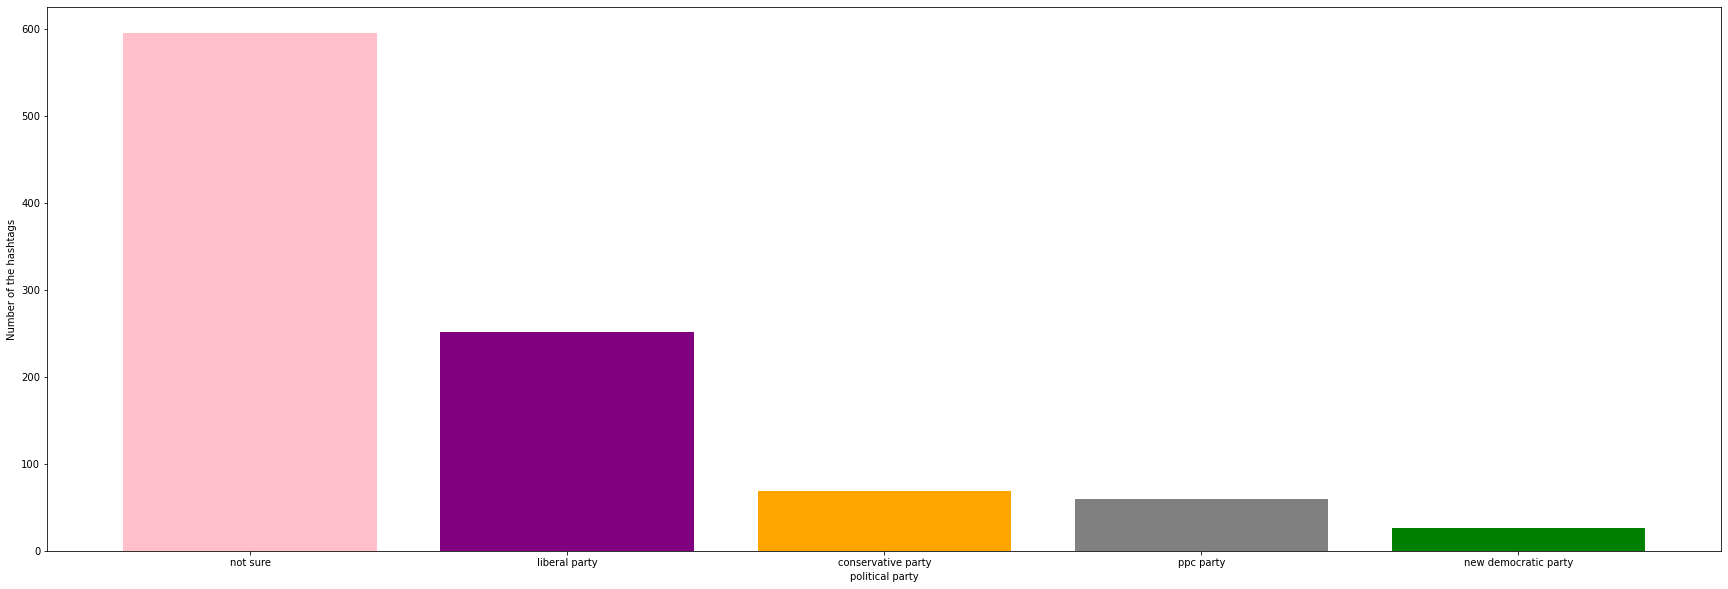

In [262]:
# Draw the bar plot for the number of tweets belonging to the policatal party's

plt.bar(counts_political.index,counts_political.political_party, color=['pink', 'purple', 'orange', 'gray', 'green'])
rcParams['figure.figsize'] = (10, 15)

plt.xlabel("political party")
plt.ylabel("Number of the hashtags")

#### <div style='color:blue'> - Exploratory analysis :What can you say about the distribution of the political affiliations of the tweets? 
    
<div style='color: Tomato'> I noticed that most of people are still liberal party, and the conservative & PPC party are almost the same, the democratic party have less people to suppot, the reason may be that liberal party alreay control goverment for many years in power, the people have become accustomed to them.

### <div style='color:black'> 2.2 Present a graphical figure
#### <div style='color:blue'> 2.2.1 Use hashtags to find information - sentiment_analysis dataframe

In [39]:
# hashtag for sentiment df.
pd.set_option('display.max_colwidth', -1)

# The method to find the hashtage is I split the text use "#"
# The text before the '#' is just the normal sentence, but the text behind the # is the hashtage
temp_111=sentiment['text']
temp_list = temp_111.str.split('#') 
temp_list.head()
temp_l = []
for i in temp_list.keys():
    temp_l += temp_list[i][1:]
    
temp_list_liberal = pd.Series(temp_l)
# To calculate which hashtags exist most, use the value_counts
all_hashtag_sentiment=temp_list_liberal.value_counts()


/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_43198/2833447879.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [40]:
# Show in the dataframe, which hashtage exist the most
hash_top10_sentiment=pd.DataFrame(all_hashtag_sentiment).head(10)
hash_top10_sentiment

,0
trecru,14184
pushawardskathniels,950
pjnet,773
hiring,667
quote,623
love,578
funny,505
job,486
sex,485
600daysofkillingyemenis,441


Text(0, 0.5, 'Number of the hashtags')

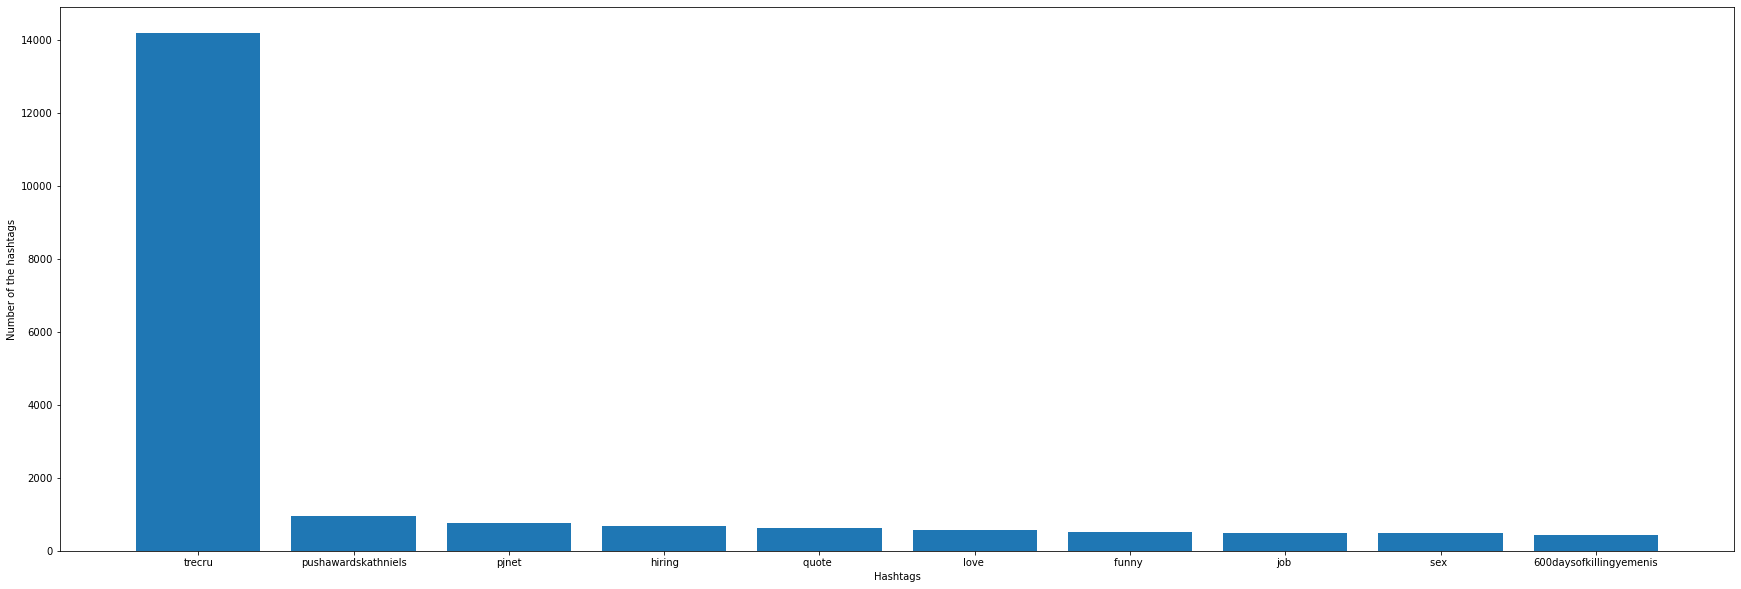

In [260]:
# Draw the bar plot for the first 10 hashtags in sentiment df
plt.bar(hash_top10_sentiment.index,hash_top10_sentiment[0])
rcParams['figure.figsize'] = (30, 10)
plt.xlabel("Hashtags")
plt.ylabel("Number of the hashtags")

In [42]:
type(hash_top10_sentiment)

pandas.core.frame.DataFrame

#### <div style='color:blue'> 2.2.2 Use hashtags to find information - Canadian_elections_2021 dataframe
    

In [43]:
# Hashtags for the Canadian election dataframe
pd.set_option('display.max_colwidth', -1)

# The method to find the hashtage is I split the text use "#"
# The text before the '#' is just the normal sentence, but the text behind the # is the hashtage
temp_election=election['text']
temp_list_election = temp_election.str.split('#') 
temp_election_l = []
for i in temp_list_election.keys():
    temp_election_l += temp_list_election[i]

temp_list_election= pd.Series(temp_election_l)
temp_list_election.value_counts()

/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_43198/3225901958.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


cdnpoli                                                                                                                                                                58
elxn44                                                                                                                                                                 55
elxn44                                                                                                                                                                 53
cdnpoli                                                                                                                                                                26
                                                                                                                                                                       24
                                                                                                                                                      

Text(0, 0.5, 'Number of the hashtags')

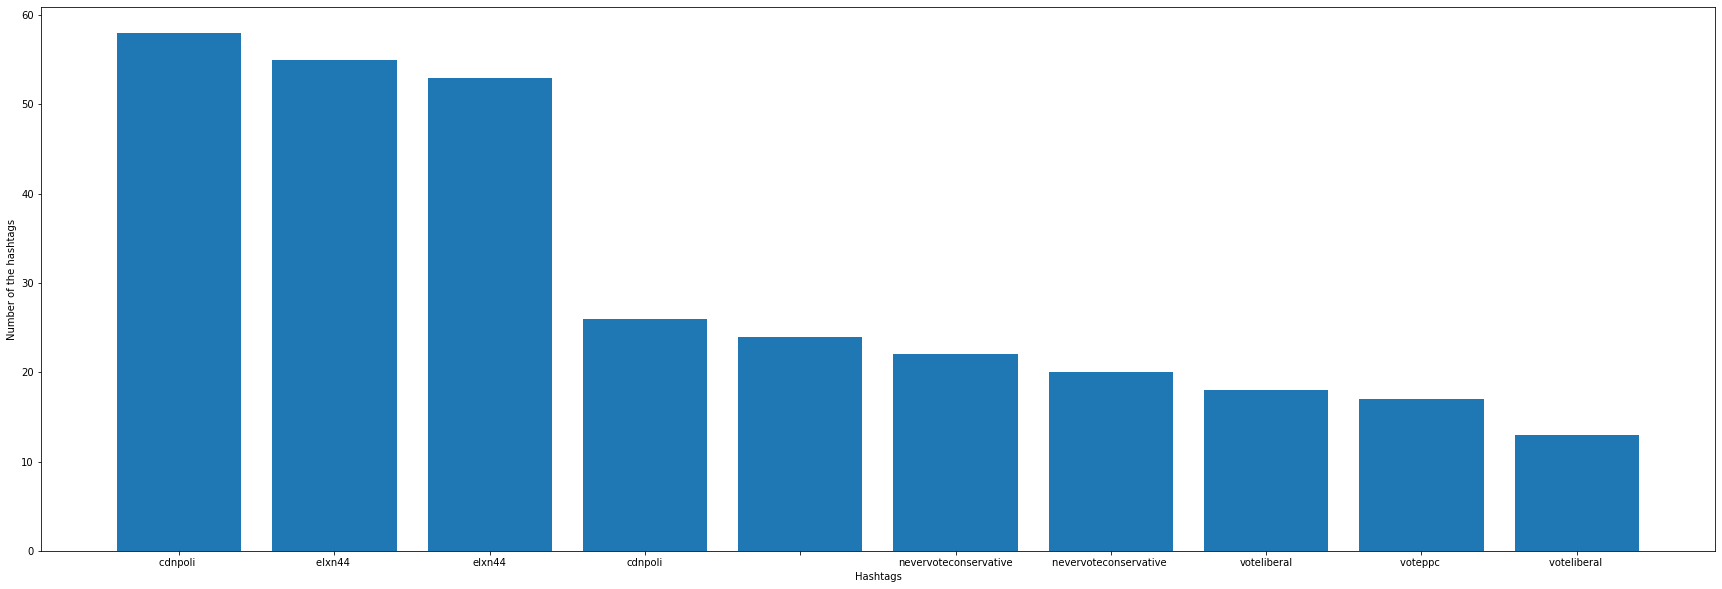

In [261]:
# Draw the bar plot for the first 10 hashtags in Canadian election dataframe
hashtag_top_10_election=temp_list_election.value_counts().head(10)
hashtag_top_10_election=pd.DataFrame(hashtag_top_10_election)
plt.bar(hashtag_top_10_election.index,hashtag_top_10_election[0])


rcParams['figure.figsize'] = (30, 10)
plt.xlabel("Hashtags")
plt.ylabel("Number of the hashtags")

#### <div style='color:blue'> 2.2.3 Find each party's hashtags to find information 
##### <div style='color:blue'>    - Liberal Party

In [45]:
# To find the hashtags about liberal party in canadian election dataframe
pd.set_option('display.max_colwidth', -1)

# Select that the text include tredeau keywords
temp_trudeau=election[election['text'].str.contains('trudeau')]
temp_trudeau.head()


/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_43198/485518215.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,text,sentiment,negative_reason
0,"canadian election power grab pm trudeau, yes -- take away opposition leaders chosen obstruction (20 non-confidence motions) disinformation middle worldwide pandemic. yes, one wanted vote; opposition antics forced it.",negative,calling election early
1,"hope trudeau loses canadian election tomorrow , called snap one thinking he’d romp it.. seems people don’t like black face hypocrite, super wokist & covid restriction groupie.. let’s hope polls right, might make government think again.",negative,covid
3,canadian friends: never forget trudeau 2 years mandate + called completely unnecessary election right vaccine mandates rolled - moment extreme political volatility. gambled country could less accountable. #elxn44,negative,calling election early
9,justin trudeau literally rocks thrown yet continued showing & answered questions election campaign. erin o’toole? hiding media day election doesn’t want answer legitimate concerns canadians have. #elxn44,positive,NaN
20,canadian election getting interesting. looks like @justintrudeau screwed timing. neck neck race unknown opposition. i'm playing going long #canadian $ & @cafreeland great #canadian economy want long!,positive,NaN


In [46]:
# Check the string include the 'trudeau'
pd.set_option('display.max_colwidth', -1)

# The method to find the hashtage is I split the text use "#"
# The text before the '#' is just the normal sentence, but the text behind the # is the hashtage
temp_liberal=election[election['text'].str.contains('trudeau')]
temp_list = temp_liberal['text'].str.split('#') 
temp_l = []
for i in temp_list.keys():
    temp_l += temp_list[i][1:]

temp_list_liberal = pd.Series(temp_l)

/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_43198/3284871860.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [47]:
print(temp_list_liberal.value_counts())

elxn44                                                                                             21
cdnpoli                                                                                            17
elxn44                                                                                             16
istandwithtrudeau                                                                                  11
cdnpoli                                                                                            11
                                                                                                   ..
debate2021                                                                                         1 
voteppc @maximebernier @tylerbeaucham20 @markfriesen08 help keep canada free, vote responsibly!    1 
voteppc want freedoms. election day                                                                1 
debatdeschef                                                                      

In [48]:
pd.DataFrame(temp_list_liberal.value_counts()).head(10)

,0
elxn44,21
cdnpoli,17
elxn44,16
istandwithtrudeau,11
cdnpoli,11
istandwithtrudeau,10
voteliberal,8
voteppc,5
votetrudeauout,4
voteliberal,3


#### So we can notice that the ‘voteliberal’，‘liberalmajority’ can be represent the hashtage for the liberal party


- **Liberal**:
    
    Leader: Justin Trudeau

    President: Suzanne Cowan

    Relavant words: real change

    Hashtage: ‘#voteliberal’，‘#liberalmajority’





##### <div style='color:blue'> - Conservative Party

In [49]:
# Check the string include the 'conservative'
pd.set_option('display.max_colwidth', -1)

# The method to find the hashtage is I split the text use "#"
# The text before the '#' is just the normal sentence, but the text behind the # is the hashtage
temp_conservative=election[election['text'].str.contains('conservative')]
temp_list = temp_conservative['text'].str.split('#') 
temp_2 = []
for i in temp_list.keys():
    temp_2 += temp_list[i][1:]

temp_list_conservative = pd.Series(temp_2)

/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_43198/1723348437.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [50]:
print(temp_list_conservative.value_counts())

nevervoteconservative                                                                22
elxn44                                                                               21
nevervoteconservative                                                                20
cdnpoli                                                                              17
elxn44                                                                               12
                                                                                     ..
maximebernier                                                                        1 
canada                                                                               1 
canadaelection                                                                       1 
canadavotes                                                                          1 
anythingbutconservative alberta! give anyone else seat! hit cons hurts edmonton!     1 
Length: 139, dtype: int64


In [51]:
pd.DataFrame(temp_list_conservative.value_counts()).head(20)

,0
nevervoteconservative,22
elxn44,21
nevervoteconservative,20
cdnpoli,17
elxn44,12
voteliberal,5
nevervotecpc,4
voteconservative,3
forwardforeveryone,3
voteppc,3


- **Conservative**

    Leader: 	Erin O'Toole

    President: 	Robert Batherson

    Relavant words: "one nation, one flag, one leader"

    Hashtage: '#voteconservative'

    Keywords: PCC, CPC

##### <div style='color:blue'> - New Democratic Party (NDP)


In [52]:
# Check the string include the 'ndp'
pd.set_option('display.max_colwidth', -1)

# The method to find the hashtage is I split the text use "#"
# The text before the '#' is just the normal sentence, but the text behind the # is the hashtage
temp_NDP=election[election['text'].str.contains('ndp')]
temp_list = temp_NDP['text'].str.split('#') 
temp_3 = []
for i in temp_list.keys():
    temp_3 += temp_list[i][1:]

temp_list_NDP = pd.Series(temp_3)

/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_43198/3004488695.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [53]:
print(temp_list_NDP.value_counts())

elxn44                     5
cdnpoli                    4
ndp                        3
cdnpoli                    3
elxn44                     3
                          ..
lpc                        1
cpc                        1
fed2021                    1
time                       1
anythingbutconservative    1
Length: 87, dtype: int64


In [54]:
pd.DataFrame(temp_list_NDP.value_counts()).head(20)

,0
elxn44,5
cdnpoli,4
ndp,3
cdnpoli,3
elxn44,3
ndp2021,3
canada,2
itsourvote,2
ndp life election fighting freedoms canadian. voted last saturday @maxinebernier @peoplespca,1
election,1


- **New Democratic Party (NDP)**

    Leader: Jagmeet Singh

    President: Dhananjai Kohli

    Relavant words: 'in it for you'

    Hashtage: '#ndp'

    Keywords: ndp, Jagmeet

##### <div style='color:blue'> -The People's Party of Canada (PPC)

In [55]:
# Check the string include the 'ndp'
pd.set_option('display.max_colwidth', -1)

# The method to find the hashtage is I split the text use "#"
# The text before the '#' is just the normal sentence, but the text behind the # is the hashtage
temp_PPC=election[election['text'].str.contains('ppc')]
temp_list = temp_PPC['text'].str.split('#') 
temp_4 = []
for i in temp_list.keys():
    temp_4 += temp_list[i][1:]

temp_list_PPC = pd.Series(temp_4)

/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_43198/3484898923.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [56]:
print(temp_list_PPC.value_counts())

voteppc                                                      17
voteppc                                                      13
ppc                                                          7 
voteppc2021                                                  5 
cdnpoli                                                      4 
                                                            .. 
voteppc freedom. unless like tyranny. vote justin otoole!    1 
darrylmackie                                                 1 
oshawa                                                       1 
voteppc2021 great canadian comeback rally via @youtube       1 
voteppc canada!                                              1 
Length: 103, dtype: int64


In [57]:
# print out the top 20 hashtags
pd.DataFrame(temp_list_PPC.value_counts()).head(20)

,0
voteppc,17
voteppc,13
ppc,7
voteppc2021,5
cdnpoli,4
maximebernierforpm,3
maximebernier,3
elxn44,3
ppc,3
onpoli,2


- **New Democratic Party (PPC)**

    Leader: Maxime Bernier

    President: 	Maxime Bernier

    Relavant words: canadian nationalism

    Hashtage: '#voteppc', '#ppc','#voteppc2021'

    Keywords: ppc, people's party of canada

#### <div style='color:blue'> 2.2.4 Use positive or negative sentiment to find information

In [58]:
positive_negative=pd.DataFrame(election['sentiment'].value_counts())
positive_negative

,sentiment
positive,615
negative,387


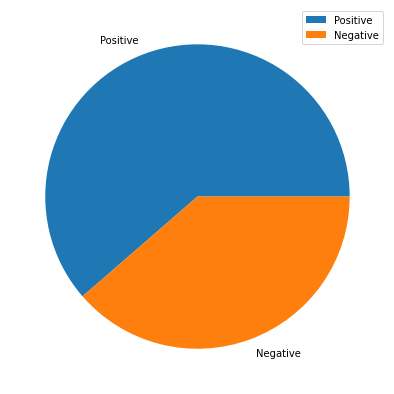

In [59]:
# Find the number of the positive and negative sentiment
labels = ["Positive", "Negative"]
plt.pie(positive_negative['sentiment'],labels=labels)
plt.legend()
plt.gcf().set_size_inches(7,7)

#### <div style='color:blue'> 2.2.5 Through the negative sentiment reasons to find information

In [60]:
# Get the negative reason
negative_reason=election['negative_reason'].value_counts()
negative_reason=pd.DataFrame(negative_reason)
negative_reason.head()

,negative_reason
others,149
calling election early,73
tell lies,61
covid,25
economy,20


Text(0, 0.5, 'Negative reasons')

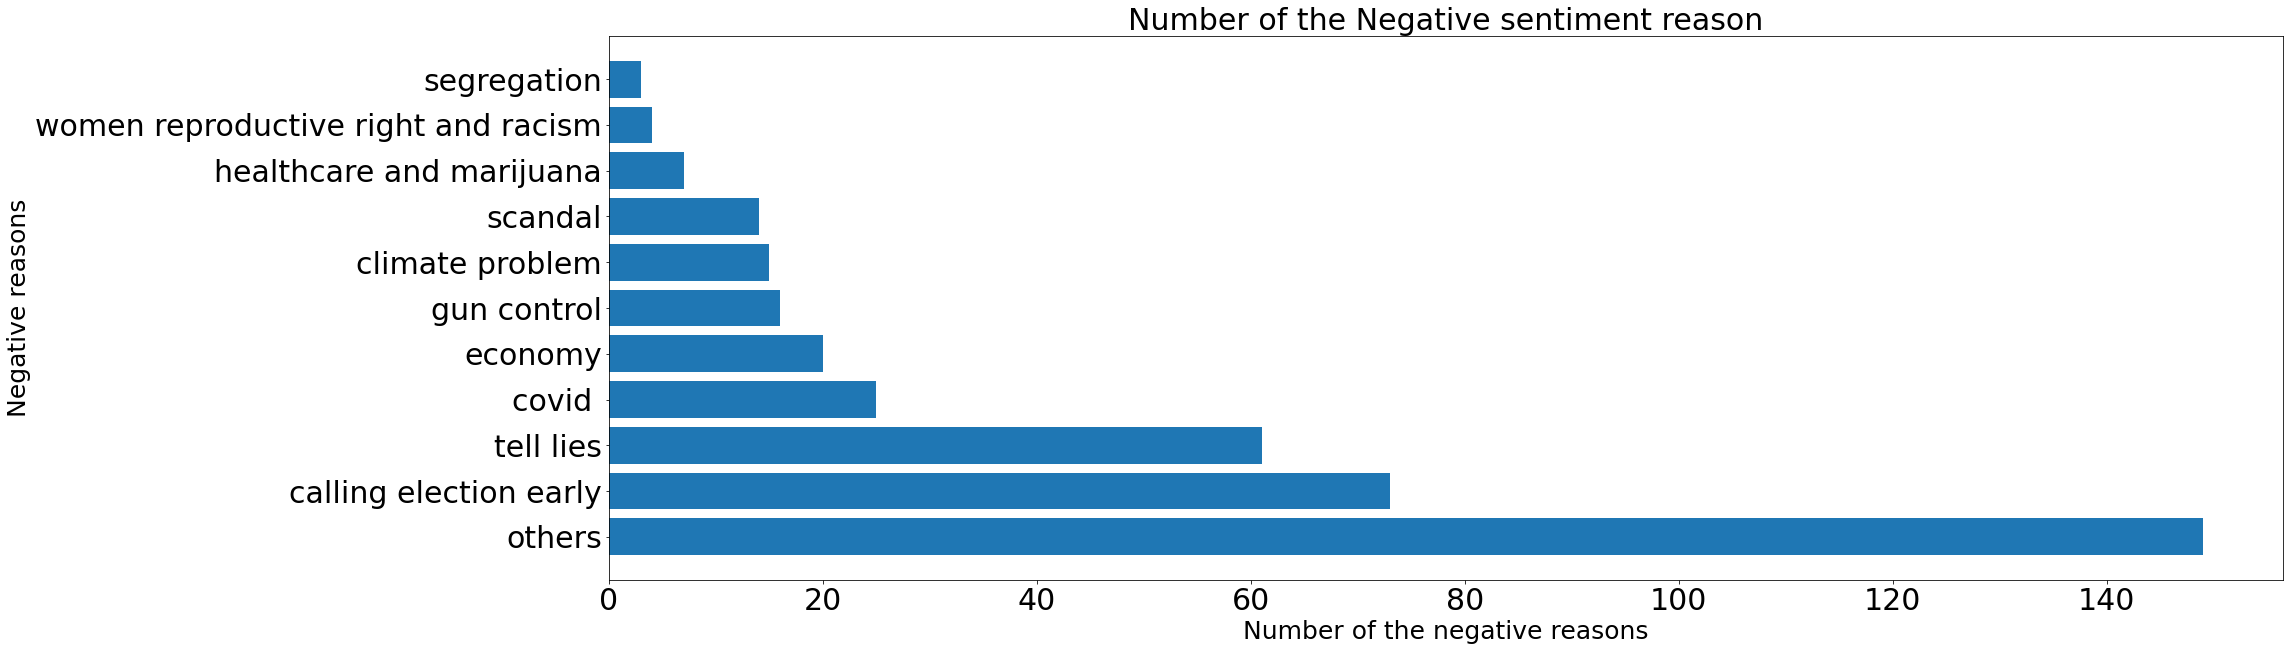

In [265]:
# Plot the negative reason
plt.barh(negative_reason.index,negative_reason['negative_reason'])
rcParams['figure.figsize'] = (30, 10)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Number of the Negative sentiment reason', fontsize=30)
plt.xlabel("Number of the negative reasons", fontsize=25)
plt.ylabel("Negative reasons",  fontsize=25)

#### <div style='color:blue'> - Exploratory analysis : Graphical figure, discuss my finding
<div style='color: Tomato'> I draw lots of graphs, First I use the sentiment dataframe to find the most frequency hashtags, I notice that #trecru has the highest frenquency, #hiring and #jobs also has a relatively high frequency. Which means that there might have some society problems related to the employment. Secondly, I draw the canadian election's dataframe, I notice that the #cdnpoli has the highest frequency. Next, I draw the pie chart to find the number of the positive and negative sentiment in the canadian electon's datafrme. I found that most of people have the positive sentiment, which means the people still very satisfied with the election results. Next I would like to know why the negative sentiment happened, so I graph for the negative sentiment reason, I find that most of the reason is the "calling election early","tell lies", which means some of the electors are lie to the people and the election was too early, so the people have the negative sentiment.

### 3. Model preparation (10 marks):

Split the generic tweets randomly into training data (70%) and test data (30%).

Prepare the data to try seven classification algorithms – logistic regression, k-NN, Naive Bayes, SVM, decision trees, Random Forest and XGBoost, where each tweet is considered a single observation/example. In these models, the target variable is the sentiment value, which is either positive or negative. Try two different types of features, Bag of Words (word frequency) and TF-IDF on all 7 models. (Hint: Be careful about when to split the dataset into training and testing set.)

In [62]:
sentiment.head()

,ID,text,label
0,7.680980e+17,josh jenkins looking forward tab breeders crown super sunday,1
1,7.680980e+17,rt @mianusmanjaved: congratulations pakistan becoming #no1testteam world odds! #ji_pakzindabadrallies,1
2,7.680980e+17,"rt @pepalerts: september, @yesmag taking maine mendoza’s surprise thanksgiving party threw fans!",1
3,7.680980e+17,"rt @david_gaibis: newly painted walls, thanks million custodial painters summer. great job ladies!!!#ec_proud",1
4,7.680980e+17,rt @cedricfeschotte: excited announce: july 2017 feschotte lab relocating @cornell mbg,1


In [63]:
# Let x only include the columns 'text', which is the independent variable
# Let y only include the target 'label', which is the sentiment of the people 

X = sentiment['text'].copy()
y = sentiment['label'].copy()

In [64]:
# Separate the data into 70% training data, 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size=0.3)

In [65]:
# Take a quick look for the number of row for X_train
X_train.shape

(385273,)

In [66]:
# Take a quick look for the number of row for X_test
X_test.shape

(165118,)

### 3.1.1 Bag of Words Feature

In [67]:
# Fit into bag of words 
bag_of_words = CountVectorizer()
# Transform both X-train and X-test into bag of words
X_train_word = bag_of_words.fit_transform(X_train)
X_test_word = bag_of_words.transform(X_test)

In [68]:
X_train_word.shape

(385273, 282047)

In [69]:
X_test_word.shape

(165118, 282047)

### 3.1.2 TF-IDF Feature

In [70]:
# Fit into TF-IDF Feature
tf_idf = TfidfVectorizer()
# Transform both X-train and X-test into TF-IDF Feature
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)

In [71]:
X_train_tf.shape

(385273, 282047)

In [72]:
X_test_tf.shape

(165118, 282047)

In [73]:
y_train.shape

(385273,)

In [74]:
y_test.shape

(165118,)

### 3.2.1 Logistic Regression

#### --  Bag of word feature in Logistic Regression

In [75]:
#Applying bag of words to Logistic Regression 
logis= LogisticRegression()
logis.fit(X_train_word,y_train)

/Users/ningcansun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
# fit the train & test data into logistic regression model
train_prediction_word_logis = logis.predict(X_train_word)
test_prediction_word_logis = logis.predict(X_test_word)

In [77]:
# find the accuracy of the y-train and the x-train under bag of words
ACC_train_word_logis = accuracy_score(y_train,train_prediction_word_logis)*100   
ACC_train_word_logis
print('Train Set Accuracy under Logistic Regression(bag of word):',ACC_train_word_logis)

Train Set Accuracy under Logistic Regression(bag of word): 98.74400749598337


In [78]:
# find the accuracy of the y-test and the x-test under bag of words
ACC_test_word_logis = accuracy_score(y_test,test_prediction_word_logis)*100   
ACC_test_word_logis
print('Test Set Accuracy under Logistic Regression(bag of word):',ACC_test_word_logis)

Test Set Accuracy under Logistic Regression(bag of word): 97.53449048559212


#### --  TF-IDF feature in Logistic Regression

In [79]:
# Applying TF-IDF into Logistic Regression 
logis= LogisticRegression()
logis.fit(X_train_tf,y_train)

/Users/ningcansun/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
# fit the train & test data into logistic regression model
train_prediction_tf_logis = logis.predict(X_train_tf)
test_prediction_tf_logis = logis.predict(X_test_tf)

In [81]:
# find the accuracy of the y-train and the x-train under TF-IDF
ACC_train_tf_logis = accuracy_score(y_train,train_prediction_tf_logis)*100 
ACC_train_tf_logis
print('Train Set Accuracy under Logistic Regression(TF-IDF):',ACC_train_tf_logis)

Train Set Accuracy under Logistic Regression(TF-IDF): 98.00297451417566


In [82]:
# find the accuracy of the y-test and the x-test under TF_IDF
ACC_test_tf_logis = accuracy_score(y_test,test_prediction_tf_logis)*100 
ACC_test_tf_logis
print('Test Set Accuracy under Logistic Regression(TF-IDF):',ACC_test_tf_logis)

Test Set Accuracy under Logistic Regression(TF-IDF): 97.28739446940976


### 3.2.2 K-NN

#### --  Bag of word feature in K-NN

In [83]:
#Applying bag of words to KNN
knn = KNeighborsClassifier()
knn.fit(X_train_word, y_train)

KNeighborsClassifier()

In [84]:
# fit the train & test data into knn model
train_prediction_word_knn = knn.predict(X_train_word)
test_prediction_word_knn = knn.predict(X_test_word)

In [86]:
# find the accuracy of the y-train and the x-train under bag of words
ACC_train_word_knn = accuracy_score(y_train,train_prediction_word_knn)*100   
ACC_train_word_knn
print('Train Set Accuracy under K-NN(bag of word):',ACC_train_word_knn)

Test Set Accuracy under K-NN(bag of word): 92.31161956903549


In [87]:
# find the accuracy of the y-test and the x-test under bag of words
ACC_test_word_knn = accuracy_score(y_test,test_prediction_word_knn)*100   
ACC_test_word_knn
print('Test Set Accuracy under K-NN(bag of word):',ACC_test_word_knn)

Test Set Accuracy under K-NN(bag of word): 86.84429317215567


#### --  TF-IDF feature in K-NN


In [88]:
# Applying TF-IDF into K-NN
knn = KNeighborsClassifier()
knn.fit(X_train_tf, y_train)

KNeighborsClassifier()

In [89]:
# fit the train & test data into K-NN model
train_prediction_tf_knn = knn.predict(X_train_tf)
test_prediction_tf_knn = knn.predict(X_test_tf)

In [90]:
# find the accuracy of the y-train and the x-train under TF-IDF
ACC_train_tf_knn = accuracy_score(y_train,train_prediction_tf_knn)*100 
ACC_train_tf_knn
print('Train Set Accuracy under K-NN(TF-IDF):',ACC_train_tf_logis)

Train Set Accuracy under K-NN(TF-IDF): 98.00262891417566


In [91]:
# find the accuracy of the y-test and the x-test under TF-IDF
ACC_test_tf_knn = accuracy_score(y_test,test_prediction_tf_knn)*100 
ACC_test_tf_knn
print('Test Set Accuracy under K-NN(TF-IDF):',ACC_test_tf_knn)

Test Set Accuracy under K-NN(TF-IDF): 57.28739446940976


### 3.2.3 Naive Bayes

#### --  Bag of word feature in Naive Bayes

In [92]:
#Applying bag of words to Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_word, y_train)

MultinomialNB()

In [93]:
# fit the train & test data into Naive Bayes model
train_prediction_word_nb = nb.predict(X_train_word)
test_prediction_word_nb = nb.predict(X_test_word)

In [94]:
# find the accuracy of the y-train and the x-train under bag of words
ACC_train_word_nb = accuracy_score(y_train,train_prediction_word_nb)*100   
ACC_train_word_nb
print('Train Set Accuracy under Naive Bayes(bag of word):',ACC_train_word_nb)

Train Set Accuracy under Naive Bayes(bag of word): 96.33143251668298


In [95]:
# find the accuracy of the y-test and the x-test under bag of words
ACC_test_word_nb = accuracy_score(y_test,test_prediction_word_nb)*100   
ACC_test_word_nb
print('Test Set Accuracy under Naive Bayes(bag of word):',ACC_test_word_nb)

Test Set Accuracy under Naive Bayes(bag of word): 94.9417991981492


#### --  TF-IDF feature in Naive Bayes

In [96]:
#Applying TF-IDF to Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tf, y_train)

MultinomialNB()

In [97]:
# fit the train & test data into Naive Bayes model
train_prediction_tf_nb = nb.predict(X_train_tf)
test_prediction_tf_nb = nb.predict(X_test_tf)

In [98]:
# find the accuracy of the y-train and the x-train under TF-IDF
ACC_train_tf_nb = accuracy_score(y_train,train_prediction_tf_nb)*100 
ACC_train_tf_nb
print('Train Set Accuracy under Naive Bayes(TF-IDF):',ACC_train_tf_nb)

Train Set Accuracy under Naive Bayes(TF-IDF): 93.7073192255881


In [99]:
# find the accuracy of the y-test and the x-test under TF-IDF
ACC_test_tf_nb = accuracy_score(y_test,test_prediction_tf_nb)*100 
ACC_test_tf_nb
print('Test Set Accuracy under Naive Bayes(TF-IDF):',ACC_test_tf_nb)

Test Set Accuracy under Naive Bayes(TF-IDF): 91.41038530020955


### 3.2.4 SVM

#### -- Bag of word feature in SVM

In [100]:
#Applying Bag of words to SVM
svm = LinearSVC()
svm.fit(X_train_word, y_train)

LinearSVC()

In [101]:
# fit the train & test data into SVM model
train_prediction_word_svm = svm.predict(X_train_word)
test_prediction_word_svm = svm.predict(X_test_word)

In [102]:
# find the accuracy of the y-train and the x-train under Bage of Word
ACC_train_word_svm = accuracy_score(y_train,train_prediction_word_svm)*100   
ACC_train_word_svm
print('Train Set Accuracy under SVM(bag of word):',ACC_train_word_svm)

Train Set Accuracy under SVM(bag of word): 99.58341228168078


In [103]:
# find the accuracy of the y-train and the x-train under Bag of word
ACC_test_word_svm = accuracy_score(y_test,test_prediction_word_svm)*100   
ACC_test_word_svm
print('Test Set Accuracy under SVM(bag of word):',ACC_test_word_svm)

Test Set Accuracy under SVM(bag of word): 97.26801438970918


#### --  TF-IDF feature in SVM

In [104]:
#Applying TF-IDF to SVM
svm = LinearSVC()
svm.fit(X_train_tf, y_train)

LinearSVC()

In [105]:
# fit the train & test data into SVM model
train_prediction_tf_svm = svm.predict(X_train_tf)
test_prediction_tf_svm = svm.predict(X_test_tf)

In [106]:
# find the accuracy of the y-train and the x-train under TF-IDF
ACC_train_tf_svm = accuracy_score(y_train,train_prediction_tf_svm)*100 
ACC_train_tf_svm
print('Train Set Accuracy under SVM(TF-IDF):',ACC_train_tf_svm)

Train Set Accuracy under SVM(TF-IDF): 99.2701279352563


In [107]:
# find the accuracy of the y-test and the x-test under TF-IDF
ACC_test_tf_svm = accuracy_score(y_test,test_prediction_tf_svm)*100 
ACC_test_tf_svm
print('Test Set Accuracy under SVM(TF-IDF):',ACC_test_tf_svm)

Test Set Accuracy under SVM(TF-IDF): 97.52237793577926


### 3.2.5 Decision Trees

#### -- Bag of word feature in Decision Trees

In [108]:
#Applying Bag of word to decision trees
tree=DecisionTreeClassifier()
tree.fit(X_train_word, y_train)

DecisionTreeClassifier()

In [109]:
# fit the train & test data into decision tree model
train_prediction_word_tree = tree.predict(X_train_word)
test_prediction_word_tree = tree.predict(X_test_word)

# find the accuracy of the y-train and the x-train under bag of words
ACC_train_word_tree = accuracy_score(y_train,train_prediction_word_tree)*100   
ACC_train_word_tree
print('Train Set Accuracy under Decision Tree(bag of word):',ACC_train_word_tree)

Train Set Accuracy under Decision Tree(bag of word): 99.988839082936


In [110]:
# find the accuracy of the y-test and the x-test under bag of words
ACC_test_word_tree = accuracy_score(y_test,test_prediction_word_tree)*100   
ACC_test_word_tree
print('Test Set Accuracy under Decision Tree(bag of word):',ACC_test_word_tree)

Test Set Accuracy under Decision Tree(bag of word): 94.96360178781235


#### -- TF-IDF feature in Decision Trees

In [111]:
#Applying TF-IDF to decision trees
tree = DecisionTreeClassifier()
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier()

In [112]:
# fit the train & test data into decision tree model
train_prediction_tf_tree = tree.predict(X_train_tf)
test_prediction_tf_tree = tree.predict(X_test_tf)

In [113]:
# find the accuracy of the y-train and the x-train under TF-IDF
ACC_train_tf_tree = accuracy_score(y_train,train_prediction_tf_tree)*100 
ACC_train_tf_tree
print('Train Set Accuracy under Decision Tree(TF-IDF):',ACC_train_tf_tree)

Train Set Accuracy under Decision Tree(TF-IDF): 99.2701279352563


In [114]:
# find the accuracy of the y-train and the x-train under TF-IDF
ACC_test_tf_tree = accuracy_score(y_test,test_prediction_tf_tree)*100 
ACC_test_tf_tree
print('Test Set Accuracy under Decision Tree(TF-IDF):',ACC_test_tf_tree)

Test Set Accuracy under Decision Tree(TF-IDF): 97.52237793577926


### 3.2.6 Random Forest

#### -- Bag of word feature in Random Forest

In [117]:
#Applying Bag of words to random forest
rf = RandomForestClassifier()
rf.fit(X_train_word, y_train)

RandomForestClassifier()


In [118]:
# fit the train & test data into Rabdom Forest model
train_prediction_word_rf = rf.predict(X_train_word)
test_prediction_word_rf = rf.predict(X_test_word)

In [119]:
# find the accuracy of the y-train and the x-train under bag of words
ACC_train_word_rf = accuracy_score(y_train,train_prediction_word_rf)*100   
ACC_train_word_rf
print('Train Set Accuracy under Random Forest(bag of word):',ACC_train_word_rf)

Train Set Accuracy under Random Forest(bag of word): 86.42267836357793


In [121]:
# find the accuracy of the y-test and the x-test under bag of words
ACC_test_word_rf = accuracy_score(y_test,test_prediction_word_rf)*100   
ACC_test_word_rf
print('Test Set Accuracy under Random Forest(bag of word)',ACC_test_word_rf)

Test Set Accuracy under Random Forest(bag of word) 83.35767888350992


#### -- TF-IDF feature in Random Forest

In [122]:
#Applying TF-IDF to random forest
rf = RandomForestClassifier()
rf.fit(X_train_tf, y_train)

RandomForestClassifier()


In [123]:
# fit the train & test data into Rabdom Forest model
train_prediction_tf_rf = rf.predict(X_train_tf)
test_prediction_tf_rf = rf.predict(X_test_tf)

In [124]:
# find the accuracy of the y-train and the x-train under TF-IDF
ACC_train_tf_rf = accuracy_score(y_train,train_prediction_tf_rf)*100 
ACC_train_tf_rf
print('Train Set Accuracy under Random Forest(TF-IDF):',ACC_train_tf_rf)

Train Set Accuracy under Random Forest(TF-IDF): 73.5101709358724


In [125]:
# find the accuracy of the y-train and the x-train under TF-IDF
ACC_test_tf_rf = accuracy_score(y_test,test_prediction_tf_rf)*100 
ACC_test_tf_rf
print('Test Set Accuracy under Random Forest(TF-IDF):',ACC_test_tf_rf)

Test Set Accuracy under Random Forest(TF-IDF): 72.1876253655926


### 3.2.7 XGBoost

#### -- Bag of word feature in XGBoost

In [126]:
xgb = XGBClassifier()
xgb.fit(X_train_word, y_train)

/Users/ningcansun/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:15:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
# fit the train & test data into XGBoost
train_prediction_word_xgb = xgb.predict(X_train_word)
test_prediction_word_xgb = xgb.predict(X_test_word)

In [128]:
# find the accuracy of the y-train and the x-train under Bag of word
ACC_train_word_xgb = accuracy_score(y_train,train_prediction_word_xgb)*100   
ACC_train_word_xgb
print('Train Set Accuracy under XGBoost(bag of word):',ACC_train_word_xgb)

Train Set Accuracy under XGBoost(bag of word): 92.78018444064338


In [129]:
# find the accuracy of the y-test and the x-test under Bag of word
ACC_test_word_xgb = accuracy_score(y_test,test_prediction_word_xgb)*100   
ACC_test_word_xgb
print('Test Set Accuracy under XGBoost(bag of word):',ACC_test_word_xgb)

Test Set Accuracy under XGBoost(bag of word): 92.74639954456812


#### -- TF-IDF feature in XGBoost

In [130]:
xgb = XGBClassifier()
xgb.fit(X_train_tf, y_train)

/Users/ningcansun/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:15:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
# fit the train & test data into XGBoost
train_prediction_tf_xgb = xgb.predict(X_train_tf)
test_prediction_tf_xgb = xgb.predict(X_test_tf)

In [134]:
# find the accuracy of the y-train and the x-train under TF-IDF
ACC_train_tf_xgb = accuracy_score(y_train,train_prediction_tf_xgb)*100 
ACC_train_tf_xgb
print('Train Set Accuracy under XGBoost(TF-IDF):',ACC_train_tf_xgb)

Train Set Accuracy under XGBoost(TF-IDF): 92.7884902393887


In [135]:
# find the accuracy of the y-test and the x-test under TF-IDF
ACC_test_tf_xgb = accuracy_score(y_test,test_prediction_tf_xgb)*100 
ACC_test_tf_xgb
print('Test Set Accuracy under XGBoost(TF-IDF):',ACC_test_tf_xgb)

Test Set Accuracy under XGBoost(TF-IDF): 92.66463983333132


#### <div style='color:blue'> - Model Preparation : Discuss my finding
    
<div style='color:Tomato'> I found that the logistic regression the accuracy overall is higher.

### 4. Model implementation and tuning (60 marks):

a) Using both types of features (Bag of Words and TF-IDF), train models on the training data from generic tweets and apply the model to the test data to obtain an accuracy value. (40 marks)

--- a. Evaluate the trained model with the best performance on the Canadian Elections data. How well do your predictions match the sentiment labelled in the Canadian elections data?

--- b. Propose two other metrics you could use to evaluate the models. In one to two sentences, provide reasoning for each metric.

--- c. Choose the model that has the best performance and visualize the sentiment prediction results and the true sentiment for each of the 4 parties. From this model, discuss your findings and whether NLP analytics based on tweets is useful for political parties during election campaigns. Explain how each party is viewed in the public eye based on the sentiment value. Suggest one way you can improve the accuracy of this model.

b) Split the negative Canadian elections tweets into training data (70%) and test data (30%). Use the true sentiment labels in the Canadian elections data instead of your predictions from the previous part. Choose one algorithms from classification algorithms (choose any model from logistic regression, k-NN, Naive Bayes, SVM, decision trees, RF, XGBoost), train multi-class classification models to predict the reason for the negative tweets. Tune the hyperparameters and chose the model with best score to test your prediction reason for negative sentiment tweets. (15 marks)

--- a. Provide a few reasons why your model may fail to predict the correct negative reasons. Back up your reasoning with examples from the test sets.

--- b. Suggest one way you can improve the accuracy of your selected model.

--- c. Feel free to combine similar reasons into fewer categories as long as you justify your reasoning. You are free to define input features of your model using word frequency analysis or other techniques.

c) Use the frequency of the words (Bag of Words) for (i) positive and (ii) negative tweets using the ground truth sentiment to rank the top-50 most frequent non-stop- words in the Canadian elections dataset. Use the true sentiment labels in the Canadian elections data. Discuss your findings. (5 marks)


### 4.a.a

In [136]:
election.head()

,text,sentiment,negative_reason
0,"canadian election power grab pm trudeau, yes -- take away opposition leaders chosen obstruction (20 non-confidence motions) disinformation middle worldwide pandemic. yes, one wanted vote; opposition antics forced it.",negative,calling election early
1,"hope trudeau loses canadian election tomorrow , called snap one thinking he’d romp it.. seems people don’t like black face hypocrite, super wokist & covid restriction groupie.. let’s hope polls right, might make government think again.",negative,covid
2,"dear canadians, election test progressive are. whether stand science, women’s bipoc rights, equality, public healthcare & education, environment. whether stand hate. much lose. don’t let us fall back. #cdnpoli #elxn44",positive,NaN
3,canadian friends: never forget trudeau 2 years mandate + called completely unnecessary election right vaccine mandates rolled - moment extreme political volatility. gambled country could less accountable. #elxn44,negative,calling election early
4,sorry @thejagmeetsingh voted #ndp life election fighting freedoms canadian. voted last saturday @maxinebernier @peoplespca #ppc #voteppc2021 #voteforhumanrights #voteforfreedom #maximebernier #purplereign #freedom,positive,NaN


In [137]:
# Encode the election dataframe's sentiment column, negative become 0, positive become 1
encode = LabelEncoder()
election.sentiment = encode.fit_transform(election.sentiment) 

In [138]:
election.head()

,text,sentiment,negative_reason
0,"canadian election power grab pm trudeau, yes -- take away opposition leaders chosen obstruction (20 non-confidence motions) disinformation middle worldwide pandemic. yes, one wanted vote; opposition antics forced it.",0,calling election early
1,"hope trudeau loses canadian election tomorrow , called snap one thinking he’d romp it.. seems people don’t like black face hypocrite, super wokist & covid restriction groupie.. let’s hope polls right, might make government think again.",0,covid
2,"dear canadians, election test progressive are. whether stand science, women’s bipoc rights, equality, public healthcare & education, environment. whether stand hate. much lose. don’t let us fall back. #cdnpoli #elxn44",1,NaN
3,canadian friends: never forget trudeau 2 years mandate + called completely unnecessary election right vaccine mandates rolled - moment extreme political volatility. gambled country could less accountable. #elxn44,0,calling election early
4,sorry @thejagmeetsingh voted #ndp life election fighting freedoms canadian. voted last saturday @maxinebernier @peoplespca #ppc #voteppc2021 #voteforhumanrights #voteforfreedom #maximebernier #purplereign #freedom,1,NaN


In [139]:
# Let the election's text column become the X_test_election
X_test_election = election['text']

In [140]:
X_test_word_election = bag_of_words.transform(X_test_election)
X_test_word_election.shape

(1002, 282047)

In [141]:
# I select the logistic regression model, because the accuracy is the highest in part 3
y_predict_election=logis.predict(X_test_word_election)
ACC_train_word_logis_election = accuracy_score(election['sentiment'],y_predict_election)*100 
print('Accuracy under Logistic Regression(bag of word):',ACC_train_word_logis_election)


Accuracy under Logistic Regression(bag of word): 73.05389221556887


### 4.a.b

In [142]:
# Use the f1 score to test
f1_score=f1_score(election['sentiment'], y_predict_election)
print("f1 score under logistic regression:", f1_score)

f1 score under logistic regression: 0.7471910112359551


In [143]:
# Use the precision score to test
precision=precision_score(election['sentiment'], y_predict_election)
print("precision score under logistic regression:", precision)

precision score under logistic regression: 0.8807947019867549


-  <div style='color:blue'> Reasoning for f1 score: 
    
 <div style='color:tomato'>I use f1 score because the f1 score is measure of the incorrectly cases, and the class is not balanced. so I use the f1 score.

-  <div style='color:blue'>Reasoning for precision score: 
    
 <div style='color:tomato'>I use precision score because the precision score is measure of the True Positive divided by the sum of True Negative and False Positive. I use it because I guess the dataset's False Positives is high, so I use the precision score.

### 4.a.c

In [144]:
# First we encode the sentiment column, let it become into 2 columns
one_hot_enc = prep.OneHotEncoder(sparse=False)
predict_election_df = one_hot_enc.fit_transform(pd.DataFrame(y_predict_election))
predict_election_df

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [145]:
# print the prediction election sentiment tabel
predict_election_df=pd.DataFrame(predict_election_df)
predict_election_df.columns = "Negative Positive".split(" ")
predict_election_df.head()

,Negative,Positive
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [146]:
# print out the prediction sentiment
y_predict_election=pd.DataFrame(y_predict_election)
y_predict_election.columns = ['Prediction Sentiment']
y_predict_election.head()


,Prediction Sentiment
0,1
1,0
2,0
3,0
4,0


In [147]:
# print out the true sentiment
election.head()
only_sentiment_election=election.drop(columns=['text','negative_reason'])
only_sentiment_election.columns = ['True Sentiment']
only_sentiment_election.head()

,True Sentiment
0,0
1,0
2,1
3,0
4,1


In [148]:
political=pd.DataFrame(election_temp.iloc[:,3])
political.head()

,political_party
0,not sure
1,liberal party
2,not sure
3,liberal party
4,not sure


In [149]:
# Combine the true sentiment and the predict sentiment into one dataframe
true_predict_sentiment=pd.concat([only_sentiment_election,political,y_predict_election], axis=1)
true_predict_sentiment.head()

,True Sentiment,political_party,Prediction Sentiment
0,0,not sure,1
1,0,liberal party,0
2,1,not sure,0
3,0,liberal party,0
4,1,not sure,0


In [150]:
true_predict_sentiment.shape

(1002, 3)

### Liberal Party plot

In [151]:
# Get the data which only belonging the liberal
liberal_true_predict = true_predict_sentiment[true_predict_sentiment['political_party']=='liberal party']
liberal_true_predict.shape

(252, 3)

Text(0.5, 1.1, '0: Negative Sentiment, 1: Positive Sentiment')

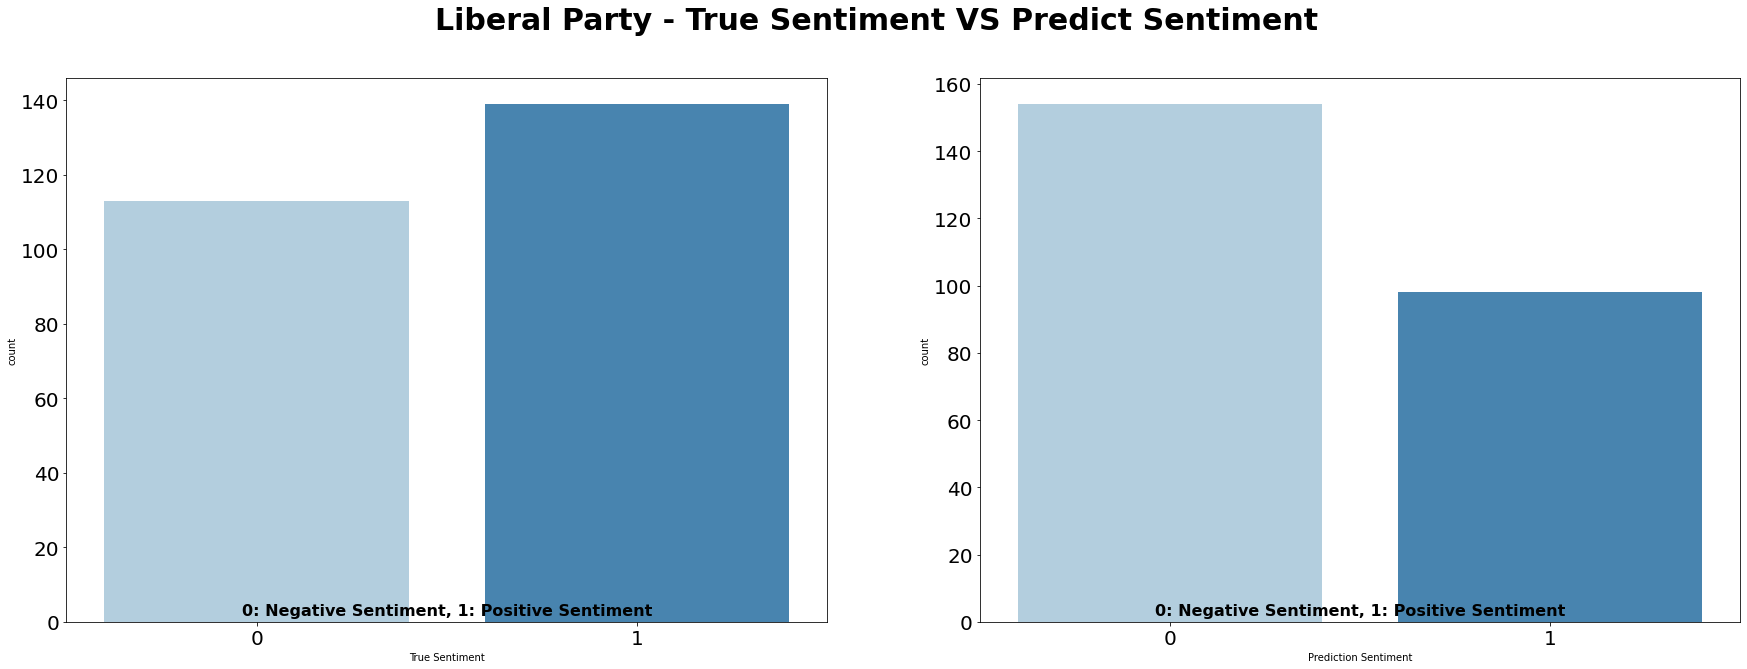

In [152]:
# plot the liberal's True sentiment & Predict Sentiment
fig,(axtrue, axpredict) = plt.subplots(1,2)
sns.countplot(x='True Sentiment',data=liberal_true_predict, palette = "Blues", ax=axtrue).tick_params(labelsize=20)
sns.countplot(x='Prediction Sentiment', data=liberal_true_predict, palette = "Blues",ax=axpredict).tick_params(labelsize=20)
fig.suptitle('Liberal Party - True Sentiment VS Predict Sentiment', fontsize=30,weight='bold')

axtrue.text(x=0.5, y=1.1, s='0: Negative Sentiment, 1: Positive Sentiment', fontsize=16, weight='bold', ha='center', va='bottom')
axpredict.text(x=0.5, y=1.1, s='0: Negative Sentiment, 1: Positive Sentiment', fontsize=16, weight='bold', ha='center', va='bottom')

### Conservative Party plot

In [153]:
# Get the data which only belonging the conservative party
conservative_true_predict = true_predict_sentiment[true_predict_sentiment['political_party']=='conservative party']
conservative_true_predict.shape

(69, 3)

Text(0.5, 1.1, '0: Negative Sentiment, 1: Positive Sentiment')

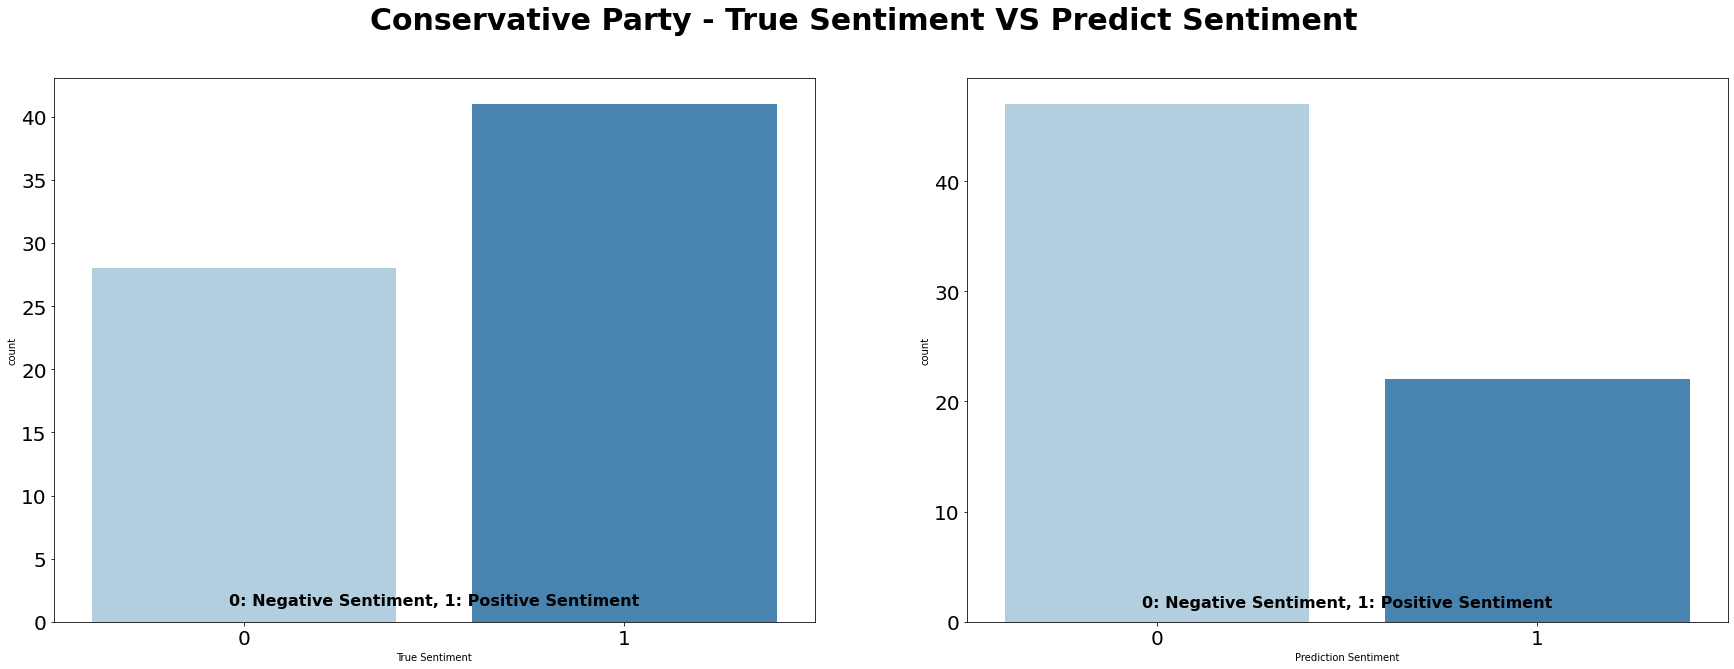

In [154]:
# plot the conservative's True sentiment & Predict Sentiment
fig,(axtrue, axpredict) = plt.subplots(1,2)
sns.countplot(x='True Sentiment',data=conservative_true_predict, palette = "Blues", ax=axtrue).tick_params(labelsize=20)
sns.countplot(x='Prediction Sentiment', data=conservative_true_predict, palette = "Blues",ax=axpredict).tick_params(labelsize=20)
fig.suptitle('Conservative Party - True Sentiment VS Predict Sentiment', fontsize=30,weight='bold')

axtrue.text(x=0.5, y=1.1, s='0: Negative Sentiment, 1: Positive Sentiment', fontsize=16, weight='bold', ha='center', va='bottom')
axpredict.text(x=0.5, y=1.1, s='0: Negative Sentiment, 1: Positive Sentiment', fontsize=16, weight='bold', ha='center', va='bottom')

### People's Party of Canada (PPC) plot

In [155]:
# Get the data which only belonging the People's Party of Canada party
ppc_true_predict = true_predict_sentiment[true_predict_sentiment['political_party']=='ppc party']
ppc_true_predict.shape

(60, 3)

Text(0.5, 1.1, '0: Negative Sentiment, 1: Positive Sentiment')

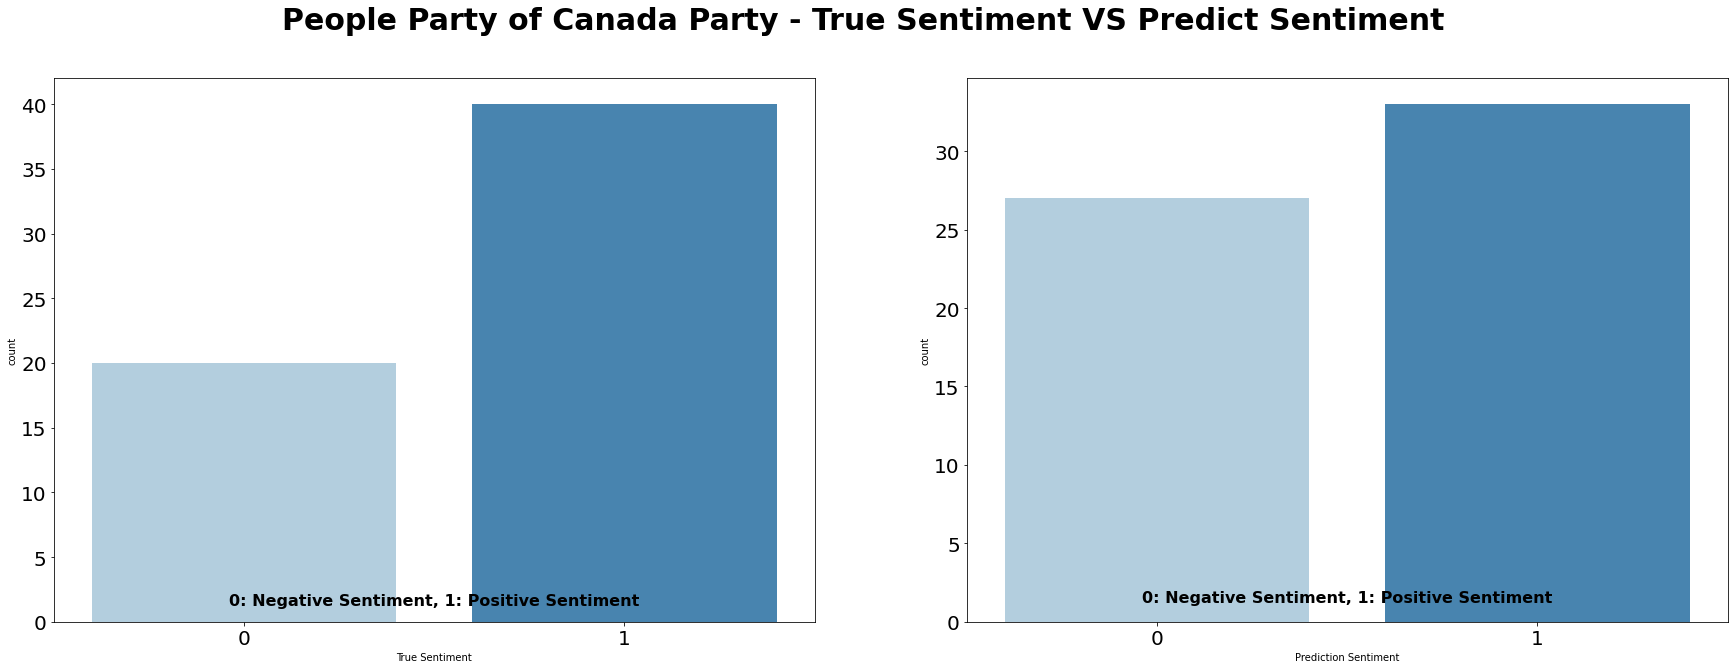

In [156]:
# plot the People's Party of Canada's True sentiment & Predict Sentiment
fig,(axtrue, axpredict) = plt.subplots(1,2)
sns.countplot(x='True Sentiment',data=ppc_true_predict, palette = "Blues", ax=axtrue).tick_params(labelsize=20)
sns.countplot(x='Prediction Sentiment', data=ppc_true_predict, palette = "Blues",ax=axpredict).tick_params(labelsize=20)
fig.suptitle('People Party of Canada Party - True Sentiment VS Predict Sentiment', fontsize=30,weight='bold')

axtrue.text(x=0.5, y=1.1, s='0: Negative Sentiment, 1: Positive Sentiment', fontsize=16, weight='bold', ha='center', va='bottom')
axpredict.text(x=0.5, y=1.1, s='0: Negative Sentiment, 1: Positive Sentiment', fontsize=16, weight='bold', ha='center', va='bottom')

### New Democratic Party plot

In [157]:
# Get the data which only belonging the People's Party of Canada party
ndp_true_predict = true_predict_sentiment[true_predict_sentiment['political_party']=='new democratic party']
ndp_true_predict.shape

(26, 3)

Text(0.5, 1.1, '0: Negative Sentiment, 1: Positive Sentiment')

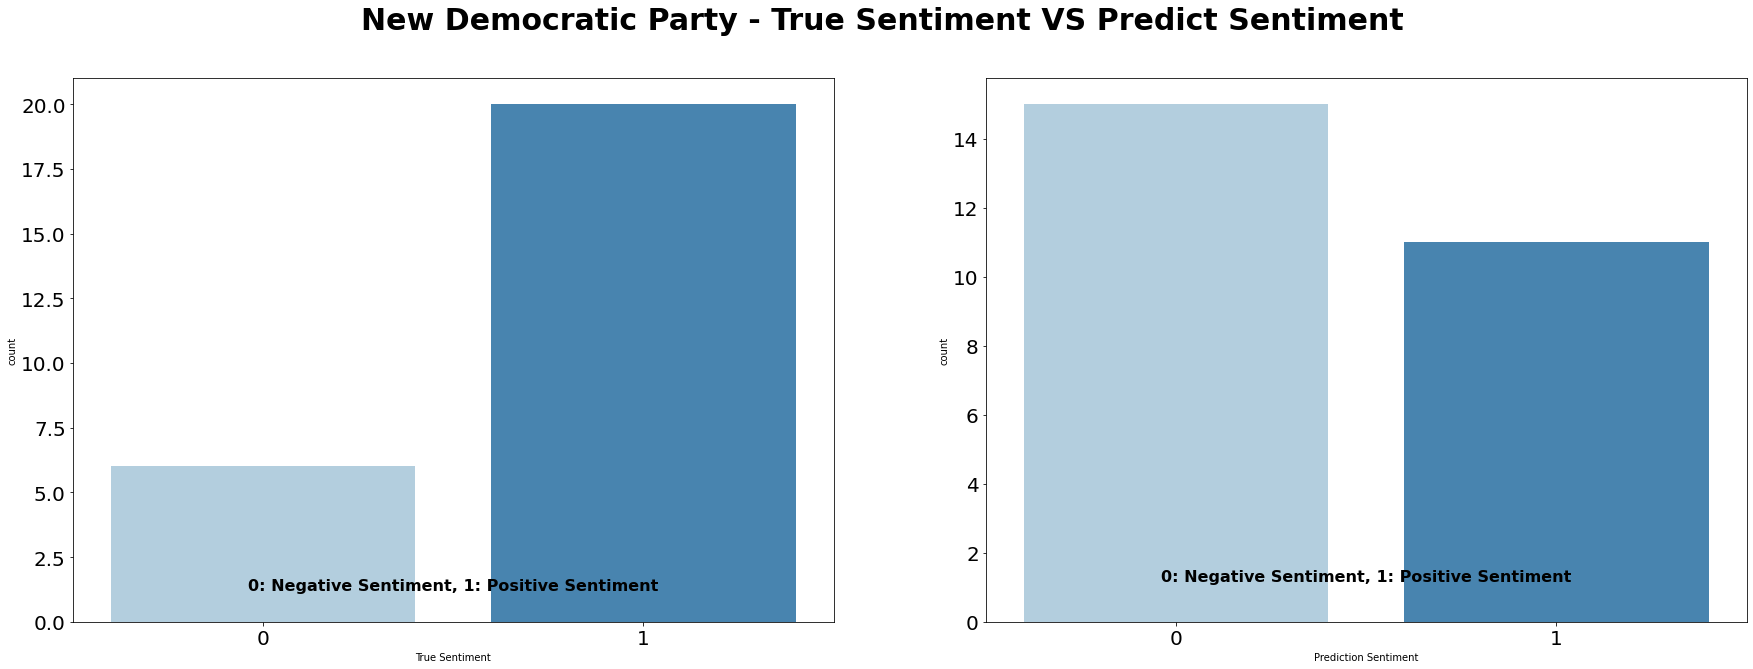

In [158]:
# plot the New Democratic Party's True sentiment & Predict Sentiment
fig,(axtrue, axpredict) = plt.subplots(1,2)
sns.countplot(x='True Sentiment',data=ndp_true_predict, palette = "Blues", ax=axtrue).tick_params(labelsize=20)
sns.countplot(x='Prediction Sentiment', data=ndp_true_predict, palette = "Blues",ax=axpredict).tick_params(labelsize=20)
fig.suptitle('New Democratic Party - True Sentiment VS Predict Sentiment', fontsize=30,weight='bold')

axtrue.text(x=0.5, y=1.1, s='0: Negative Sentiment, 1: Positive Sentiment', fontsize=16, weight='bold', ha='center', va='bottom')
axpredict.text(x=0.5, y=1.1, s='0: Negative Sentiment, 1: Positive Sentiment', fontsize=16, weight='bold', ha='center', va='bottom')

#### <div style='color:blue'> - Model Implementation: From this model, discuss your findings?
    
 <div style='color:Tomato'> The finding is that for the liberaty party and PPC party, I noticed that they are really similar, but for the conservative party and new democratic party, my prediction and the true model are have a big difference.
    
#### <div style='color:blue'> - Model Implementation: whether NLP analytics based on tweets is useful for political parties during election campaigns?
    
<div style='color:Tomato'>  I think the NLP analytics based on tweets is useful because it may have some bias, may be because the hyperparameter's issue, but overall, the estimate is fairly accurate. For the PPC party, it almost looks the same, so the NLP is really useful.
    
#### <div style='color:blue'> - Model Implementation: Explain how each party is viewed in the public eye based on the sentiment value. 
 
<div style='color:Tomato'>  I noticed that although that lots of people support liberaty party, but the negative sentiment also really high compare to the other political party. However the New Democratic has the smallest number of negative sentiment. In these 4 parties, the more people pay attention, the more negative emotions, everyone’s thinking is completely different.
    
#### <div style='color:blue'> - Model Implementation: Suggest one way you can improve the accuracy of this model. 
    
<div style='color:Tomato'> Hyper tuning, change some of the hyper parameters.

### 4.b.a

In [225]:
# extract the sentiment is negative
negative_sentiment_election=election[election['sentiment']==0]
negative_sentiment_election.head()

,text,sentiment,negative_reason
0,"canadian election power grab pm trudeau, yes -- take away opposition leaders chosen obstruction (20 non-confidence motions) disinformation middle worldwide pandemic. yes, one wanted vote; opposition antics forced it.",0,calling election early
1,"hope trudeau loses canadian election tomorrow , called snap one thinking he’d romp it.. seems people don’t like black face hypocrite, super wokist & covid restriction groupie.. let’s hope polls right, might make government think again.",0,covid
3,canadian friends: never forget trudeau 2 years mandate + called completely unnecessary election right vaccine mandates rolled - moment extreme political volatility. gambled country could less accountable. #elxn44,0,calling election early
5,"vaccines & guns key election o'toole serious plan get canadians vaccinated (he can't even get candidates vaccinated) & playing games guns deliver fun lobby. many canadians (and me), climate issue. so...",0,covid
6,"i’m sorry, moderators respond leadership candidates can’t? debate farce frankly disservice canadians, awful 2019 formats hope next election see new moderation format. they’ve two goes, that’s enough. #elxn44 #cdnpoli",0,others


In [207]:
#negative_sentiment_election[negative_sentiment_election['negative_reason']=='covid ']

In [208]:
# Due to the index is not in order, so we reset the index
negative_sentiment_election = negative_sentiment_election.reset_index(drop=True)
negative_sentiment_election.head()

,text,sentiment,negative_reason
0,"canadian election power grab pm trudeau, yes -- take away opposition leaders chosen obstruction (20 non-confidence motions) disinformation middle worldwide pandemic. yes, one wanted vote; opposition antics forced it.",0,calling election early
1,"hope trudeau loses canadian election tomorrow , called snap one thinking he’d romp it.. seems people don’t like black face hypocrite, super wokist & covid restriction groupie.. let’s hope polls right, might make government think again.",0,covid
2,canadian friends: never forget trudeau 2 years mandate + called completely unnecessary election right vaccine mandates rolled - moment extreme political volatility. gambled country could less accountable. #elxn44,0,calling election early
3,"vaccines & guns key election o'toole serious plan get canadians vaccinated (he can't even get candidates vaccinated) & playing games guns deliver fun lobby. many canadians (and me), climate issue. so...",0,covid
4,"i’m sorry, moderators respond leadership candidates can’t? debate farce frankly disservice canadians, awful 2019 formats hope next election see new moderation format. they’ve two goes, that’s enough. #elxn44 #cdnpoli",0,others


In [209]:
negative_sentiment_election['negative_reason'].nunique()

11

It has 11 distict negative reason, so we need to encode and conbine some of the reasons.

In [210]:
# Negative reason is the target, but it is str, we need the numeric
# Prepare for the target encodeing
# Check the unique value for the negative reason

negative_sentiment_election['negative_reason'].value_counts()

others                                 149
calling election early                 73 
tell lies                              61 
covid                                  25 
economy                                20 
gun control                            16 
climate problem                        15 
scandal                                14 
healthcare and marijuana               7  
women reproductive right and racism    4  
segregation                            3  
Name: negative_reason, dtype: int64

I would like to seperate the negative reason in to different groups 

In [226]:
#Prepare for one-vs-all transformation, check the number of null values
check_nagative=pd.DataFrame(negative_sentiment_election['negative_reason'])
check_nagative.isna().sum()

negative_reason    0
dtype: int64

In [227]:
# government_reason: it means it caused by the government themselves
# other
# Election reason: which is called by electors
# Society Reason: it means it is influence not only canada, this reasob is influence lots of people
# Gender Reason: it means there are some issues related to the gender.
# Econony reason: economy issue
government_reason=['segregation','gun control','calling election early']
other=['others']
elector_reason=['tell lies','scandal']
society_reason=['covid ','climate problem','healthcare and marijuana']
gender_reason=['women reproductive right and racism']
economy_reason=['economy']

In [228]:
negative_sentiment_election['negative_reason_encode']=negative_sentiment_election['negative_reason'].replace(['segregation','gun control','calling election early','others','tell lies','scandal','covid ','climate problem','healthcare and marijuana','women reproductive right and racism','economy'] ,[0,0,0,1,2,2,3,3,3,4,5])

/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_43198/759902188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sentiment_election['negative_reason_encode']=negative_sentiment_election['negative_reason'].replace(['segregation','gun control','calling election early','others','tell lies','scandal','covid ','climate problem','healthcare and marijuana','women reproductive right and racism','economy']


In [229]:
negative_sentiment_election=pd.DataFrame(negative_sentiment_election)
negative_sentiment_election.head()

,text,sentiment,negative_reason,negative_reason_encode
0,"canadian election power grab pm trudeau, yes -- take away opposition leaders chosen obstruction (20 non-confidence motions) disinformation middle worldwide pandemic. yes, one wanted vote; opposition antics forced it.",0,calling election early,0
1,"hope trudeau loses canadian election tomorrow , called snap one thinking he’d romp it.. seems people don’t like black face hypocrite, super wokist & covid restriction groupie.. let’s hope polls right, might make government think again.",0,covid,3
3,canadian friends: never forget trudeau 2 years mandate + called completely unnecessary election right vaccine mandates rolled - moment extreme political volatility. gambled country could less accountable. #elxn44,0,calling election early,0
5,"vaccines & guns key election o'toole serious plan get canadians vaccinated (he can't even get candidates vaccinated) & playing games guns deliver fun lobby. many canadians (and me), climate issue. so...",0,covid,3
6,"i’m sorry, moderators respond leadership candidates can’t? debate farce frankly disservice canadians, awful 2019 formats hope next election see new moderation format. they’ve two goes, that’s enough. #elxn44 #cdnpoli",0,others,1


In [230]:
# let x only include the columns with the independent variable 'text', but let y only include the target
X = negative_sentiment_election['text'].copy()
y = negative_sentiment_election['negative_reason_encode'].copy()

In [231]:
# Separate the data into 70% training data, 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size=0.3)

In [232]:
X_train.shape

(270,)

In [233]:
X_test.shape

(117,)

In [234]:
# Bag of words to transform x_train
X_train_word_negative = bag_of_words.fit_transform(X_train)
X_test_word_negative = bag_of_words.transform(X_test)

In [235]:
X_train_word_negative.shape

(270, 2071)

In [236]:
X_test_word_negative.shape

(117, 2071)

In [237]:
#Applying CountVectorizer to Logistic Regression 
logis= LogisticRegression()
logis.fit(X_train_word_negative,y_train)

LogisticRegression()

In [239]:
# Put the X-train into logistic regression model
y_predict_election_negative_train=logis.predict(X_train_word_negative)
y_predict_election_negative_test=logis.predict(X_test_word_negative)

In [240]:
y_predict_election_negative_train.shape

(270,)

In [241]:
y_train.shape

(270,)

In [242]:
y_predict_election_negative_test.shape

(117,)

In [243]:
y_test.shape

(117,)

In [271]:
y_predict_election_negative_train=pd.DataFrame(y_predict_election_negative_train)
y_predict_election_negative_train.columns = ['Predict negative reason']
y_predict_election_negative_train.head()

,Predict negative reason
0,1
1,0
2,1
3,3
4,2


In [248]:
# Ignore warning message
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.filterwarnings('ignore')

# Model tuning, with change the solver, penalty, c.
model = LogisticRegression()
scaler = StandardScaler()
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','none']
c_values = [0.1,1,10,100,200]
grid = dict(solver=solver,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy')
result = grid.fit(X_train_word_negative, y_train)



/var/folders/k8/5mxt7tx502x182rpcwd55p080000gn/T/ipykernel_43198/1048369727.py:3: UserWarning: DelftStack
  warnings.warn('DelftStack')


In [249]:
print("Best model prediction percentage: %f using %s" % (result.best_score_, result.best_params_))

Best model prediction percentage: 0.535802 using {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


#### <div style='color:blue'> - Model Implementation: Provide a few reasons why your model may fail to predict the correct negative reasons?
  
<div style='color:Tomato'> The reason why my model fail to predict is that there may have some bias, also the data is not balance data, which may also influence the result. Also the model may not good, maybe we can try the other models, such as decision tree. Our hyperparameter may not tuning good.

### 4.b.b

#### <div style='color:blue'> - Model Implementation: Suggest one way you can improve the accuracy of your selected model.
    
<div style='color:Tomato'> Change the hyperparameter. Also, the data is not enough, there is only 300 variables has the negative reason, if we have more dataset, it will increase the accuracy of my model.

### 4.b.c

In [272]:
# government_reason: it means it caused by the government themselves
# other
# Election reason: which is called by electors
# Society Reason: it means it is influence not only canada, this reasob is influence lots of people
# Gender Reason: it means there are some issues related to the gender.
# Econony reason: economy issue
government_reason=['segregation','gun control','calling election early']
other=['others']
elector_reason=['tell lies','scandal']
society_reason=['covid ','climate problem','healthcare and marijuana']
gender_reason=['women reproductive right and racism']
economy_reason=['economy']

In [273]:
negative_sentiment_election['negative_reason_encode']=negative_sentiment_election['negative_reason'].replace(['segregation','gun control','calling election early','others','tell lies','scandal','covid ','climate problem','healthcare and marijuana','women reproductive right and racism','economy'] ,[0,0,0,1,2,2,3,3,3,4,5])

#### <div style='color:blue'> - Model Implementation: Feel free to combine similar reasons into fewer categories as long as you justify your reasoning.
    
<div style='color:Tomato'> I divided into 6 groups, which are the 1. government_reason: it means it caused by the government themselves; 2. other; 3. Election reason: which is called by electors; 4. Society Reason: it means it is influence not only canada, this reasob is influence lots of people; 5. Gender Reason: it means there are some issues related to the gender; 6. Econony reason: economy issue.

### 4.c

#### Negative text word frequency

In [250]:
# Select the column 'text' in the negative sentiment election true table
negative_text=negative_sentiment_election['text']

In [251]:
# Transform the text into bag of words 
negative_text_words=bag_of_words.fit_transform(negative_text)

In [253]:
# Find the top50 frequency
word = bag_of_words.get_feature_names()  
count_list = negative_text_words.toarray().sum(axis=0)   
neg=list(dict(zip(word,count_list)).items())
negative_word_rank = pd.DataFrame(neg)
negative_word_rank = negative_word_rank.sort_values([1], ascending=False)
negative_word_rank.columns=['Word','Frequency']
negative_word_rank.head(50)

,Word,Frequency
723,election,265
2321,trudeau,159
369,canadians,146
1619,otoole,88
362,canada,78
365,canadian,65
1638,pandemic,51
1230,justintrudeau,47
733,elxn44,45
1323,like,43


#### Positive text word frequency

In [254]:
# Select the column 'sentiment' is positive
positive_sentiment_election=election[election['sentiment']==1]

In [255]:
# Reset the index
positive_sentiment_election = positive_sentiment_election.reset_index(drop=True)
positive_sentiment_election.head()

,text,sentiment,negative_reason
0,"dear canadians, election test progressive are. whether stand science, women’s bipoc rights, equality, public healthcare & education, environment. whether stand hate. much lose. don’t let us fall back. #cdnpoli #elxn44",1,NaN
1,sorry @thejagmeetsingh voted #ndp life election fighting freedoms canadian. voted last saturday @maxinebernier @peoplespca #ppc #voteppc2021 #voteforhumanrights #voteforfreedom #maximebernier #purplereign #freedom,1,NaN
2,canadians #voteppc support @maximebernier would blow un globalists great reset agenda 2030! could also catalyst freedom countries around world (including us) would respond too! election important!,1,NaN
3,justin trudeau literally rocks thrown yet continued showing & answered questions election campaign. erin o’toole? hiding media day election doesn’t want answer legitimate concerns canadians have. #elxn44,1,NaN
4,"#throwbackthursday federal election debate night 2019, ready tie 🤗 happens #election2021 debate night tonight - i'm ready jump anyone talks taxing cookies! #vote #canada #cdnpoli",1,NaN


In [256]:
# Select the column 'text' in the positive sentiment election true table
positive_text=positive_sentiment_election['text']

In [257]:
# Transform the text into bag of words 
positive_text_words=bag_of_words.fit_transform(positive_text)

In [258]:
# Find the top50 frequency
word = bag_of_words.get_feature_names()  
count_list = positive_text_words.toarray().sum(axis=0)   
neg=list(dict(zip(word,count_list)).items())
positive_word_rank = pd.DataFrame(neg)
positive_word_rank = positive_word_rank.sort_values([1], ascending=False)
positive_word_rank.columns=['Word','Frequency']
positive_word_rank.head(50)

,Word,Frequency
856,election,399
2841,vote,190
2713,trudeau,178
421,canadian,178
427,canadians,140
411,canada,138
1907,otoole,124
1149,good,74
873,elxn44,71
2924,win,62
